In [157]:
import numpy as np #to conduct mathematical operations
import pandas as pd #to assist in in handling and operating on dataframes
import yfinance as yf #to allow us to download the data we need for our analysis 
import matplotlib.pyplot as plt #to plot the figures needed to explain our results
from scipy.stats import linregress #a statistical package to allow us to perform a linear regression model to find the optimal weights

In [158]:
BTC = yf.download('BTC-USD', start='2022-12-22', end='2022-12-23',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [159]:
BTC #To display the dataframe downloaded

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-22 00:00:00+00:00,16818.380859,16818.380859,16818.380859,16818.380859,16818.380859,0
2022-12-22 00:01:00+00:00,16825.763672,16825.763672,16825.763672,16825.763672,16825.763672,0
2022-12-22 00:02:00+00:00,16824.031250,16824.031250,16824.031250,16824.031250,16824.031250,1409024
2022-12-22 00:03:00+00:00,16829.160156,16829.160156,16829.160156,16829.160156,16829.160156,0
2022-12-22 00:04:00+00:00,16829.492188,16829.492188,16829.492188,16829.492188,16829.492188,0
...,...,...,...,...,...,...
2022-12-22 23:55:00+00:00,16828.492188,16828.492188,16828.492188,16828.492188,16828.492188,17562624
2022-12-22 23:56:00+00:00,16829.121094,16829.121094,16829.121094,16829.121094,16829.121094,0
2022-12-22 23:57:00+00:00,16828.197266,16828.197266,16828.197266,16828.197266,16828.197266,0


In [160]:
ETH = yf.download('ETH-USD', start='2022-12-22', end='2022-12-23',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [161]:
ETH #to display the dataframe downloaded

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-22 00:00:00+00:00,1213.672607,1213.672607,1213.672607,1213.672607,1213.672607,0
2022-12-22 00:01:00+00:00,1214.051025,1214.051025,1214.051025,1214.051025,1214.051025,0
2022-12-22 00:02:00+00:00,1213.826782,1213.826782,1213.826782,1213.826782,1213.826782,0
2022-12-22 00:03:00+00:00,1214.177002,1214.177002,1214.177002,1214.177002,1214.177002,5888
2022-12-22 00:04:00+00:00,1214.120728,1214.120728,1214.120728,1214.120728,1214.120728,0
...,...,...,...,...,...,...
2022-12-22 23:55:00+00:00,1218.341797,1218.341797,1218.341797,1218.341797,1218.341797,4136960
2022-12-22 23:56:00+00:00,1218.353638,1218.353638,1218.353638,1218.353638,1218.353638,508416
2022-12-22 23:57:00+00:00,1218.216064,1218.216064,1218.216064,1218.216064,1218.216064,1118208


In [162]:
S1_0 = BTC['Open'][0]
S2_0 = ETH['Open'][0]

In [163]:
S1_0

16818.380859375

In [164]:
S2_0

1213.672607421875

In [165]:
BTC_lr = np.log(BTC['Adj Close'] / BTC['Adj Close'].shift(1)) # to calculate the log returns of BTC
ETH_lr = np.log(ETH['Adj Close'] / ETH['Adj Close'].shift(1)) # to calculate the log returns of ETH
BTC_mu = BTC_lr.mean() * 1435 #To calculate the mean of  daily return
ETH_mu = ETH_lr.mean() * 1435  #To calculate the mean of daily return
BTC_sigma = BTC_lr.std() * np.sqrt(1435) #to calculate the daily std deviation
ETH_sigma = ETH_lr.std() * np.sqrt(1435) #to calculate the daily std deviation
rho = BTC_lr.corr(ETH_lr) # to calculate the correlation between BTC and ETH
z_0 = 0.00 #co-integrating vector which we set to 0 and t=0
gamma = 0.5 # the constant risk aversion coefficient
delta = 1 #
T = 1
M = len(BTC)

In [166]:
BTC_lr # to display the log returns of BTC per minute

Datetime
2022-12-22 00:00:00+00:00         NaN
2022-12-22 00:01:00+00:00    0.000439
2022-12-22 00:02:00+00:00   -0.000103
2022-12-22 00:03:00+00:00    0.000305
2022-12-22 00:04:00+00:00    0.000020
                               ...   
2022-12-22 23:55:00+00:00   -0.000062
2022-12-22 23:56:00+00:00    0.000037
2022-12-22 23:57:00+00:00   -0.000055
2022-12-22 23:58:00+00:00    0.000053
2022-12-23 00:00:00+00:00    0.000033
Name: Adj Close, Length: 1435, dtype: float64

In [167]:
ETH_lr # to display the log returns of BTC per minute

Datetime
2022-12-22 00:00:00+00:00         NaN
2022-12-22 00:01:00+00:00    0.000312
2022-12-22 00:02:00+00:00   -0.000185
2022-12-22 00:03:00+00:00    0.000288
2022-12-22 00:04:00+00:00   -0.000046
                               ...   
2022-12-22 23:55:00+00:00    0.000097
2022-12-22 23:56:00+00:00    0.000010
2022-12-22 23:57:00+00:00   -0.000113
2022-12-22 23:58:00+00:00   -0.000067
2022-12-23 00:00:00+00:00   -0.000045
Name: Adj Close, Length: 1435, dtype: float64

In [168]:
print("The Daily return of BTC is", BTC_mu)
print("The Daily return of ETH is", ETH_mu)

The Daily return of BTC is 0.0006699666258308526
The Daily return of ETH is 0.003626863457051584


In [169]:
print("The Daily Standard Deviation of BTC is", BTC_sigma)
print("The Daily Standard Deviaton of ETH is", ETH_sigma)

The Daily Standard Deviation of BTC is 0.0075988971247093265
The Daily Standard Deviaton of ETH is 0.014319371992142336


In [170]:
print("The correlation between BTC and ETH is",rho) # to display the correlation between BTC and ETH

The correlation between BTC and ETH is 0.8621530339244382


In [171]:
result = linregress(np.log(BTC['Adj Close']), np.log(ETH['Adj Close'])) # this is to perform a linear regression of of BTC and ETH
beta = result.slope # the beta is the slope of this linear regression, using least squarred method.
print('The slope or beta of our linear regression between BTC and ETH is', beta)


The slope or beta of our linear regression between BTC and ETH is 1.7714539464779646


In [172]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
BTC_Pi = np.zeros((M + 1, 1))
ETH_Pi = np.zeros((M + 1, 1))

In [173]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(BTC_sigma ** 2 + beta ** 2 * ETH_sigma ** 2 + 2 * beta * BTC_sigma * ETH_sigma * rho)
eta = (-1/delta) * (BTC_mu - BTC_sigma ** 2/2 + beta*(ETH_mu - ETH_sigma ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((BTC_sigma + beta * ETH_sigma * rho)/ sigma_beta * rn1[t] + beta * (ETH_sigma * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = BTC['Adj Close'][t-1]
    S2[t] = ETH['Adj Close'][t-1]

Text(0.5, 1.0, 'Cryptocurrency Price')

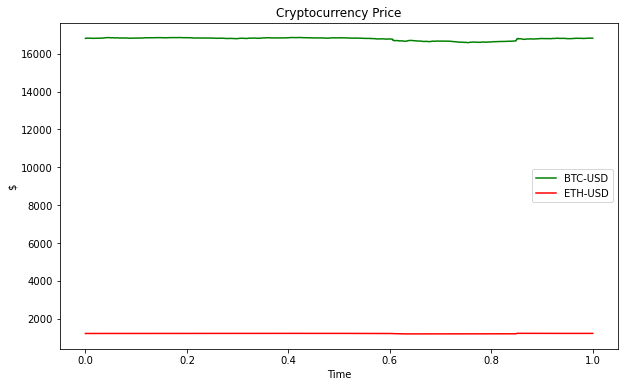

In [174]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'g', lw=1.5, label='BTC-USD')
plt.plot(tt, S2, 'r', lw=1.5, label='ETH-USD')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cryptocurrency Price')

Text(0.5, 1.0, 'z')

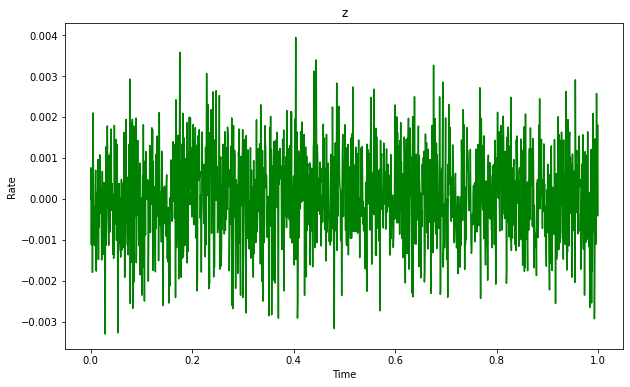

In [175]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [176]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * BTC_sigma ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (BTC_sigma ** 2 + beta * ETH_sigma ** 2)/((1 - rho ** 2) * BTC_sigma ** 2) - rho * ETH_mu * (T - t * dt)/((1 - rho **2) * BTC_sigma * ETH_sigma)
    c[t] = 0.5 * ETH_mu ** 2 * (T - t * dt)/((1 - rho ** 2) * ETH_sigma ** 2) + 0.25 * (T - t * dt) ** 2 * (BTC_sigma ** 2 + beta * ETH_sigma ** 2 + 2 * BTC_sigma * ETH_sigma * beta *rho) * delta ** 2/((1 - rho ** 2) * BTC_sigma ** 2) + 0.25 * (T - t * dt) ** 2 * ETH_mu * delta * rho * (BTC_sigma ** 2 + beta * ETH_sigma ** 2) + 1/24 * (T - t * dt) ** 3 * (BTC_sigma ** 2 + beta * ETH_sigma ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * BTC_sigma ** 2)
    BTC_Pi[t] = (1 / S1[t]) * ((BTC_mu + delta * z[t])/(gamma * (1 - rho ** 2) * BTC_sigma ** 2) + delta/gamma * (-2 * a[t] * (BTC_mu + delta * z[t])-b[t]) - rho * ETH_mu/(gamma * (1 - rho ** 2) * BTC_sigma * ETH_sigma))
    ETH_Pi[t] = (1 / S2[t]) * (ETH_mu / (gamma * (1 - rho ** 2) * ETH_sigma ** 2) + delta * beta / gamma * (- 2 * a[t] * (BTC_mu + delta * z[t]) - b[t]) - rho * (BTC_mu + delta * z[t]) / (gamma * (1 - rho ** 2) * BTC_sigma * ETH_sigma))

Optimal Weights

Text(0.5, 1.0, 'Weights')

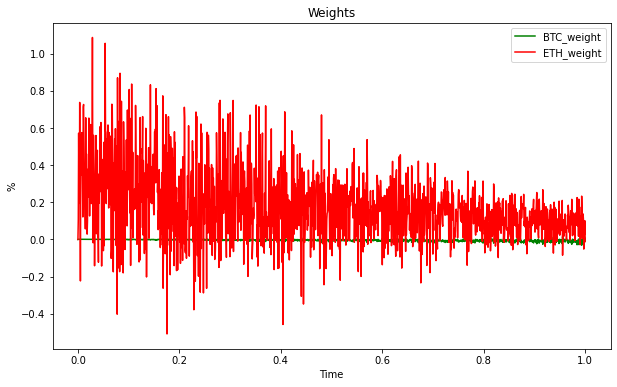

In [177]:
plt.figure(figsize=(10, 6))
plt.plot(tt, BTC_Pi, 'g', lw=1.5, label='BTC_weight')
plt.plot(tt, ETH_Pi, 'r', lw=1.5, label='ETH_weight')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Optimal Wealth Process - Negative means selling and you get cash

Text(0.5, 1.0, 'Cash')

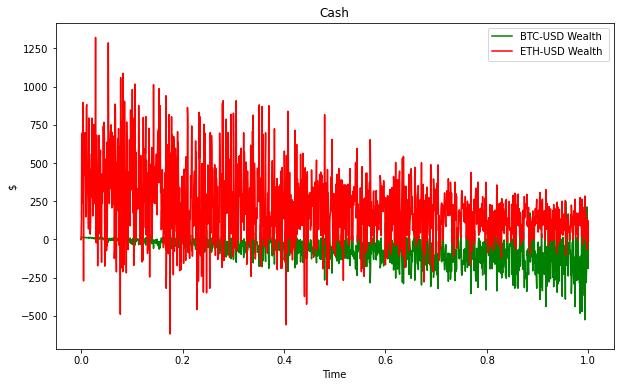

In [178]:
plt.figure(figsize=(10, 6))
plt.plot(tt, BTC_Pi * S1, 'g', lw=1.5, label='BTC-USD Wealth ')
plt.plot(tt, ETH_Pi * S2, 'r', lw=1.5, label='ETH-USD Wealth')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [179]:
Wealth = abs(BTC_Pi * S1) + abs(ETH_Pi * S2)

Text(0.5, 1.0, 'Wealth')

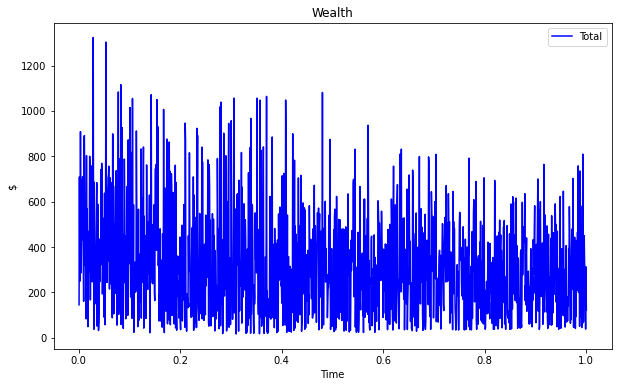

In [180]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')

plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

Inital Wealth

In [181]:
Wealth[1]

array([144.67624911])

Ending Wealth

In [182]:
Wealth[-1]

array([122.36619533])

Return

In [183]:
(Wealth[-1] - Wealth[1])/Wealth[1]

array([-0.15420675])

Text(0.5, 1.0, 'Comparison')

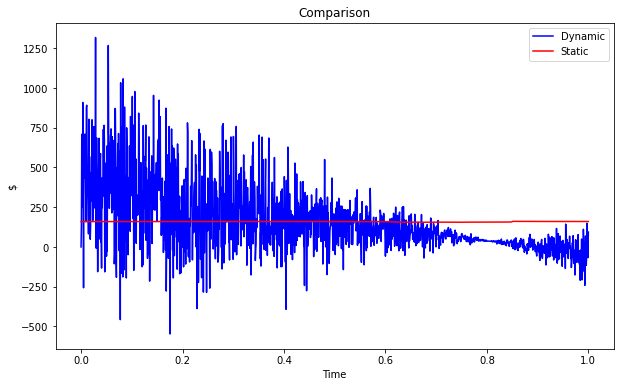

In [184]:
plt.figure(figsize=(10, 6))
plt.plot(tt, BTC_Pi * S1 + ETH_Pi * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, BTC_Pi.mean() * S1 + ETH_Pi.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

# Simulation and Finding Optimal Control Factors

In [185]:
# We define empty array to store the prices of BTC and ETH as well as the weights
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

### Price Similuation of BTC and ETH using real parameters of Sigma, Mu and rho

In [190]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(BTC_sigma ** 2 + beta ** 2 * ETH_sigma ** 2 + 2 * beta * BTC_sigma * ETH_sigma * rho)
eta = (-1/delta) * (BTC_mu - BTC_sigma ** 2/2 + beta*(ETH_mu - ETH_sigma ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((BTC_sigma + beta * ETH_sigma * rho)/ sigma_beta * rn1[t] + beta * (ETH_sigma * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((BTC_mu + delta * z[t] - BTC_sigma ** 2 / 2) * dt + BTC_sigma * np.sqrt(dt) * rn1[t]) #co-integrated prices of BTC which satisfies the SDE given in our papers
    S2[t] = S2[t-1] * np.exp((ETH_mu - ETH_sigma ** 2 / 2) * dt + ETH_sigma * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]) )

### Plotting the simulated prices

Text(0.5, 1.0, 'Stock Price')

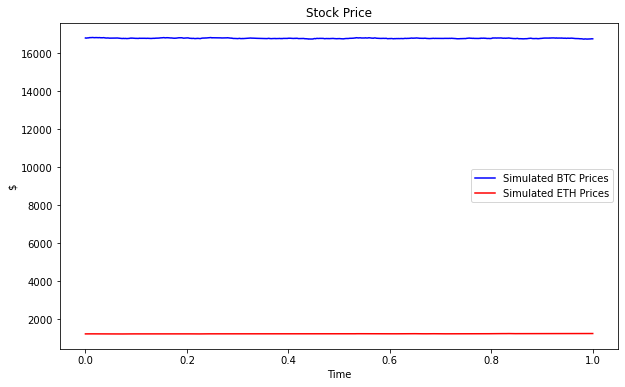

In [191]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='Simulated BTC Prices')
plt.plot(tt, S2, 'r', lw=1.5, label='Simulated ETH Prices')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

In [192]:
print(S1)
print(S2)

[[16818.38085938]
 [16813.42259586]
 [16810.96914172]
 ...
 [16773.10697701]
 [16772.71687418]
 [16773.89490078]]
[[1213.67260742]
 [1213.47313567]
 [1212.86251756]
 ...
 [1232.83417468]
 [1232.87857112]
 [1233.228847  ]]


### Plotting z

Text(0.5, 1.0, 'Alpha')

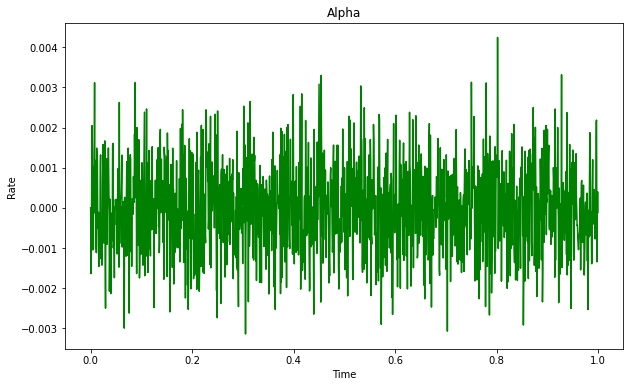

In [193]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('Alpha')

### Find Optimal Contral Weights under simulated prices

In [194]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * BTC_sigma ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (BTC_sigma ** 2 + beta * ETH_sigma ** 2)/((1 - rho ** 2) * BTC_sigma ** 2) - rho * ETH_mu * (T - t * dt)/((1 - rho **2) * BTC_sigma * ETH_sigma)
    c[t] = 0.5 * ETH_mu ** 2 * (T - t * dt)/((1 - rho ** 2) * ETH_sigma ** 2) + 0.25 * (T - t * dt) ** 2 * (BTC_sigma ** 2 + beta * ETH_sigma ** 2 + 2 * BTC_sigma * ETH_sigma * beta *rho) * delta ** 2/((1 - rho ** 2) * BTC_sigma ** 2) + 0.25 * (T - t * dt) ** 2 * ETH_mu * delta * rho * (BTC_sigma ** 2 + beta * ETH_sigma ** 2) + 1/24 * (T - t * dt) ** 3 * (BTC_sigma ** 2 + beta * ETH_sigma ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * BTC_sigma ** 2)
    BTC_Pi[t] = (1 / S1[t]) * ((BTC_mu + delta * z[t])/(gamma * (1 - rho ** 2) * BTC_sigma ** 2) + delta/gamma * (-2 * a[t] * (BTC_mu + delta * z[t])-b[t]) - rho * ETH_mu/(gamma * (1 - rho ** 2) * BTC_sigma * ETH_sigma))
    ETH_Pi[t] = (1 / S2[t]) * (ETH_mu / (gamma * (1 - rho ** 2) * ETH_sigma ** 2) + delta * beta / gamma * (- 2 * a[t] * (BTC_mu + delta * z[t]) - b[t]) - rho * (BTC_mu + delta * z[t]) / (gamma * (1 - rho ** 2) * BTC_sigma * ETH_sigma))

Text(0.5, 1.0, 'Weights')

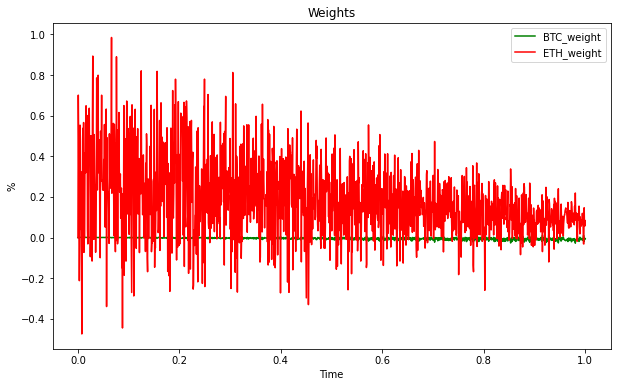

In [195]:
plt.figure(figsize=(10, 6))
plt.plot(tt, BTC_Pi, 'g', lw=1.5, label='BTC_weight')
plt.plot(tt, ETH_Pi, 'r', lw=1.5, label='ETH_weight')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

### Plotting the Wealth Process

Text(0.5, 1.0, 'Cash')

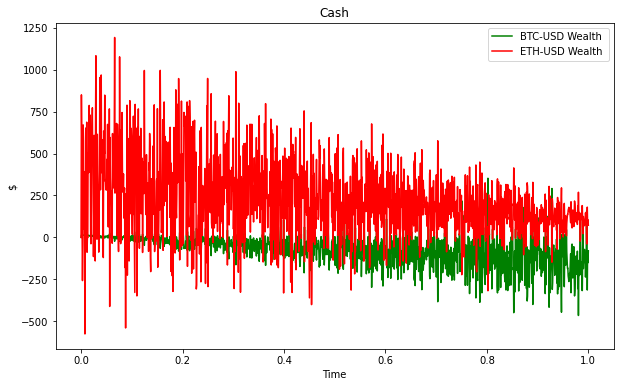

In [196]:
plt.figure(figsize=(10, 6))
plt.plot(tt, BTC_Pi * S1, 'g', lw=1.5, label='BTC-USD Wealth ')
plt.plot(tt, ETH_Pi * S2, 'r', lw=1.5, label='ETH-USD Wealth')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [197]:
Wealth = abs(BTC_Pi * S1) + abs(ETH_Pi * S2)

Text(0.5, 1.0, 'Wealth')

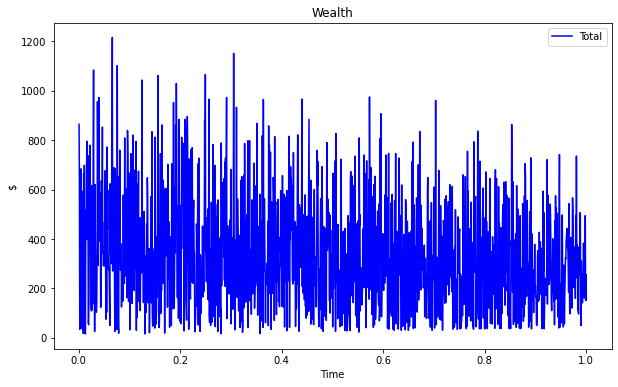

In [198]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')

plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [199]:
Wealth[1]

array([864.28766027])

In [200]:
Wealth[-1]

array([153.83700479])

In [201]:
(Wealth[-1] - Wealth[1])/Wealth[1]

array([-0.82200717])

### Comparison between Dynamics Weights under simulated prices and static weights

Text(0.5, 1.0, 'Comparison')

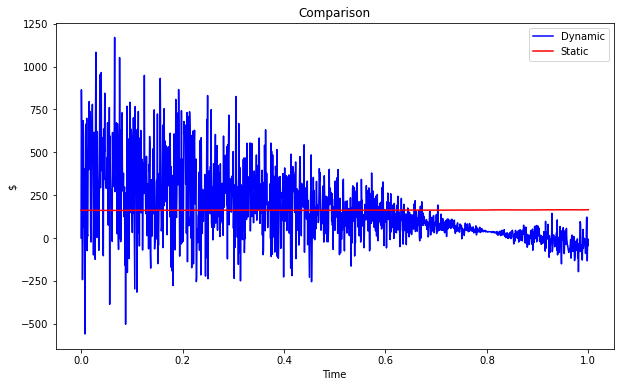

In [202]:
plt.figure(figsize=(10, 6))
plt.plot(tt, BTC_Pi * S1 + ETH_Pi * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, BTC_Pi.mean() * S1 + ETH_Pi.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')